In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def chance_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')                                          

In [4]:
all_data_dir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/'

In [5]:
figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

## Find accuracy by each level 

In [6]:
analysis_name = 'ind_level_analysis'

In [7]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [8]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


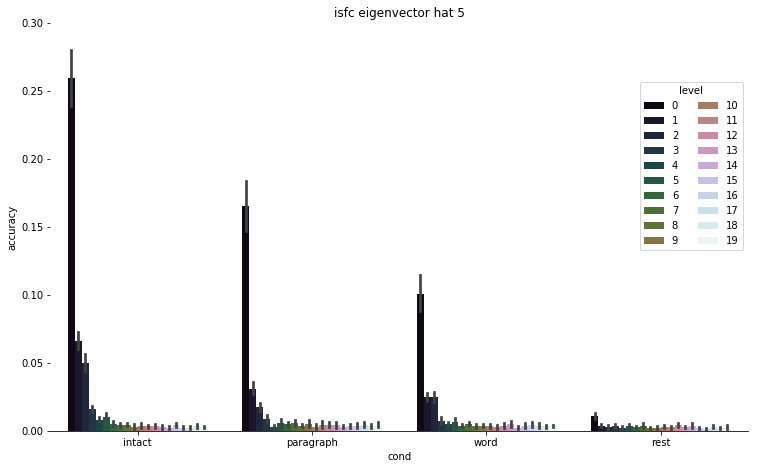

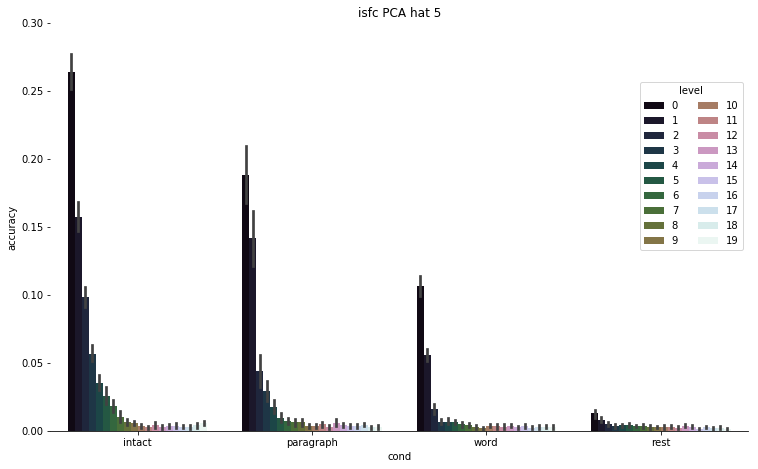

In [9]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

## Plot proportion of peak accuracy 

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


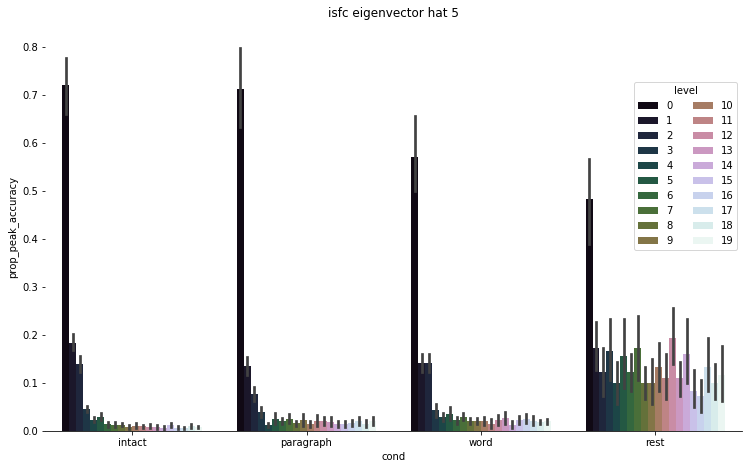

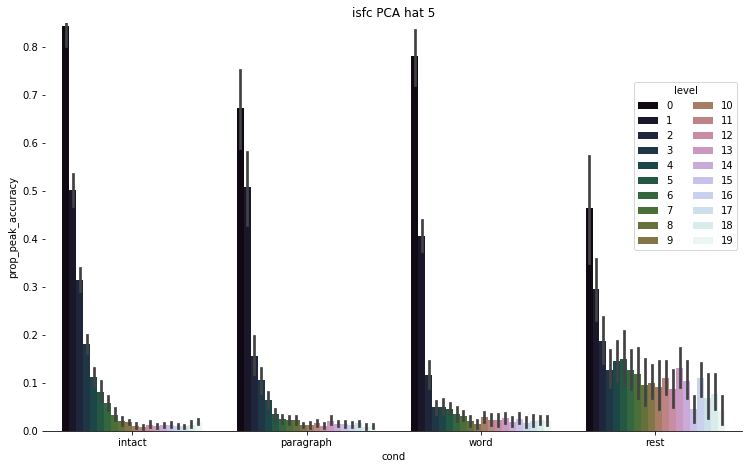

In [10]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['prop_peak_accuracy'] = data['accuracy']/data['accuracy'].max()
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'prop_peak_accuracy', 'level', ymin=0, ymax=.85, title=title, outfile=outfile)
    plt.close()

## Find optimimal level

In [11]:
analysis_name = 'optimize_levels'

In [12]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [13]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


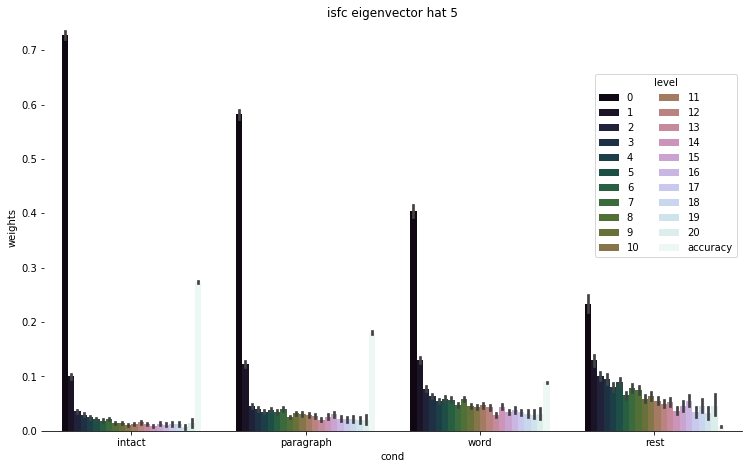

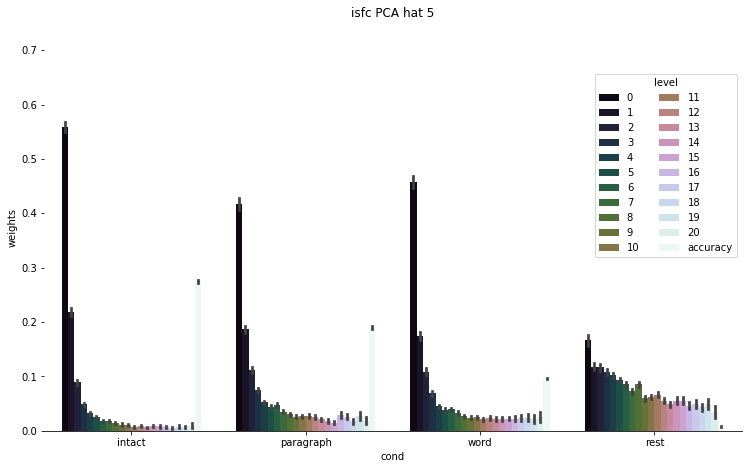

In [14]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


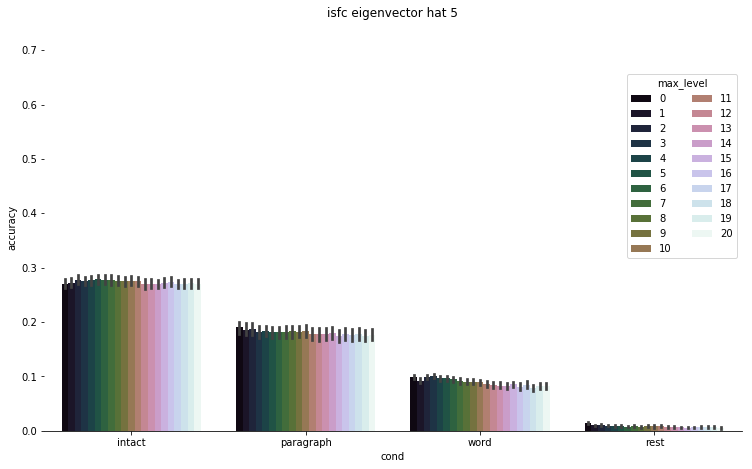

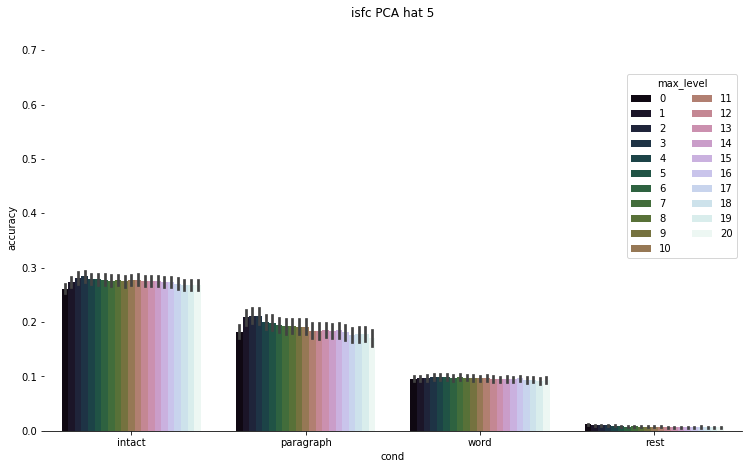

In [15]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

In [16]:
full_data

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_11,level_12,...,level_4,level_5,level_6,level_7,level_8,level_9,rank,iteration,cond,max_level
0,0,0.280000,0.010367,0,20,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.988667,19,intact,0
1,0,0.330000,0.010511,0,20,0.777453,0.222547,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.990378,19,intact,1
2,0,0.320000,0.013911,0,20,0.333326,0.333327,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.991478,19,intact,2
3,0,0.333333,0.010600,0,20,0.250000,0.250001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.991400,19,intact,3
4,0,0.353333,0.009067,0,20,0.261223,0.178694,NaN,NaN,NaN,...,1.996204e-01,NaN,NaN,NaN,NaN,NaN,0.990444,19,intact,4
5,0,0.356667,0.011900,0,20,0.287852,0.252693,NaN,NaN,NaN,...,1.935112e-01,1.760876e-22,NaN,NaN,NaN,NaN,0.990978,19,intact,5
6,0,0.340000,0.010933,0,20,0.369072,0.152600,NaN,NaN,NaN,...,8.709086e-02,7.474742e-02,9.591277e-02,NaN,NaN,NaN,0.990567,19,intact,6
7,0,0.336667,0.010300,0,20,0.355613,0.123630,NaN,NaN,NaN,...,1.732330e-01,7.889725e-02,3.947409e-03,2.672679e-02,NaN,NaN,0.990122,19,intact,7
8,0,0.356667,0.009156,0,20,0.373395,0.117471,NaN,NaN,NaN,...,1.063823e-01,7.793314e-02,6.649230e-02,5.003673e-02,9.994791e-18,NaN,0.990100,19,intact,8
9,0,0.343333,0.010367,0,20,0.564159,0.199148,NaN,NaN,NaN,...,4.076561e-02,1.252521e-02,6.930229e-18,5.696909e-07,0.000000e+00,6.930229e-18,0.990822,19,intact,9


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


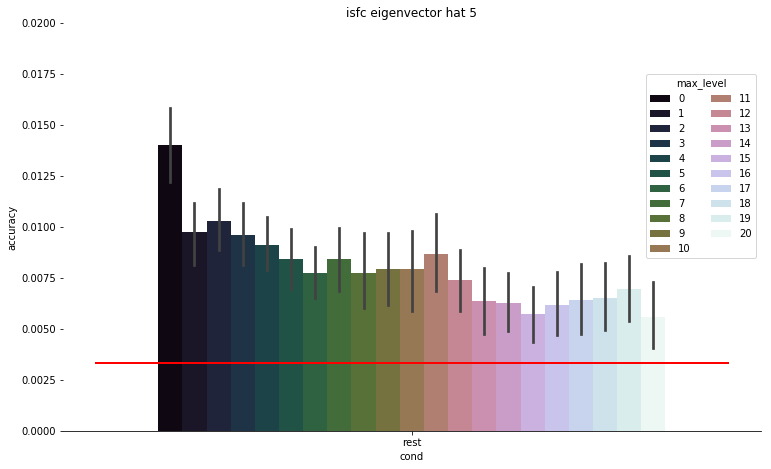

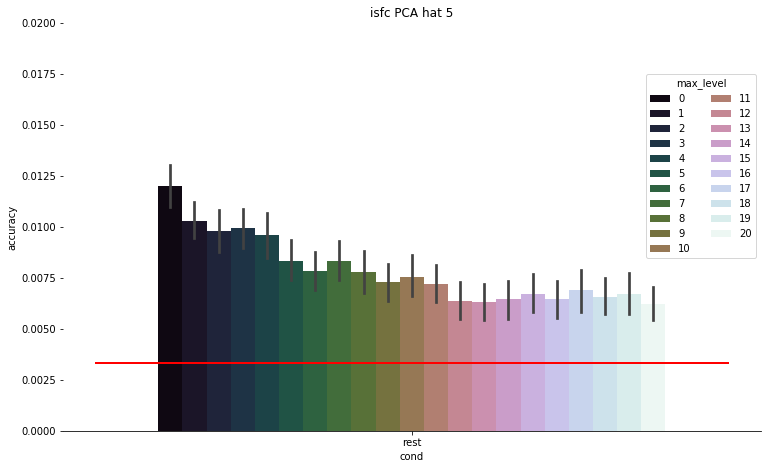

In [17]:
## rest
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    c = glob.glob(os.path.join(p, 'rest*'))[0]

    full_data = pd.DataFrame()
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])
    data['max_level'] = 20 - data.isnull().sum(axis=1)
    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    chance_barplot(full_data, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.02, title=title, outfile=outfile)
    plt.close()

## For peak accuracy by level

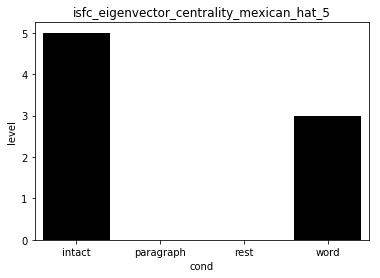

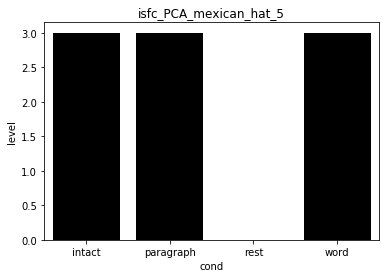

In [18]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = []
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        df = data.groupby(['max_level'], as_index=False)['accuracy'].mean()
        levs.append(df[df['accuracy'] == df.max()['accuracy']]['max_level'].values[0])
        cs.append(os.path.basename(os.path.splitext(c)[0]))

    full_data = pd.DataFrame({'level':levs, 'cond':cs})
    sns.barplot(x='cond', y='level', color='k', data=full_data).set_title(param_name)
    plt.show()

## Optimize weights time-chunked

In [19]:
analysis_name = 'level_analysis_chunked'

In [20]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [21]:
params = glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


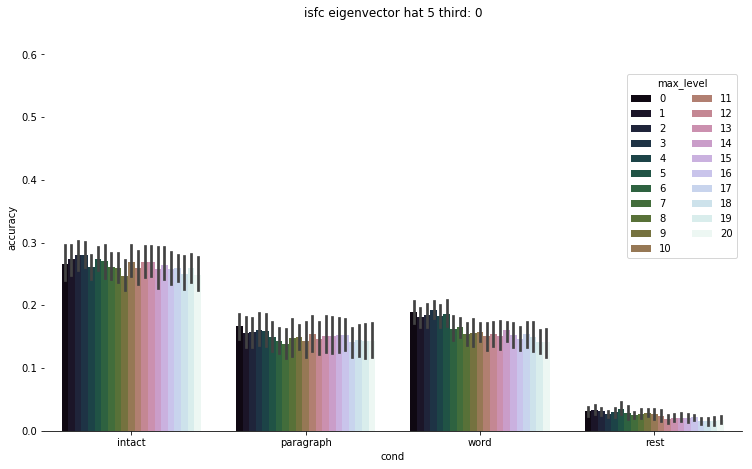

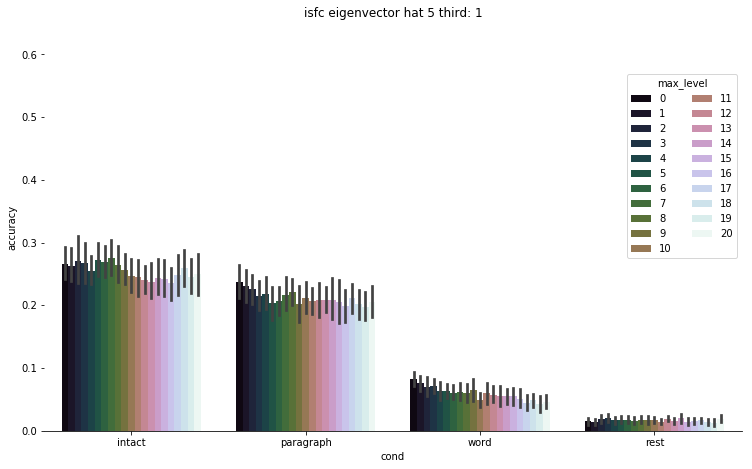

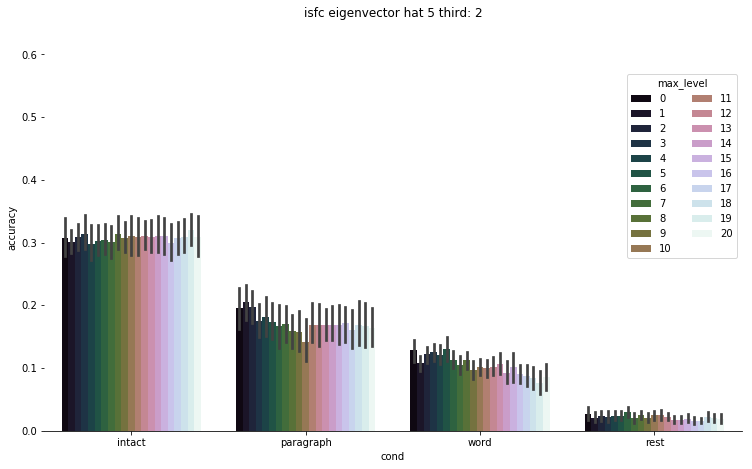

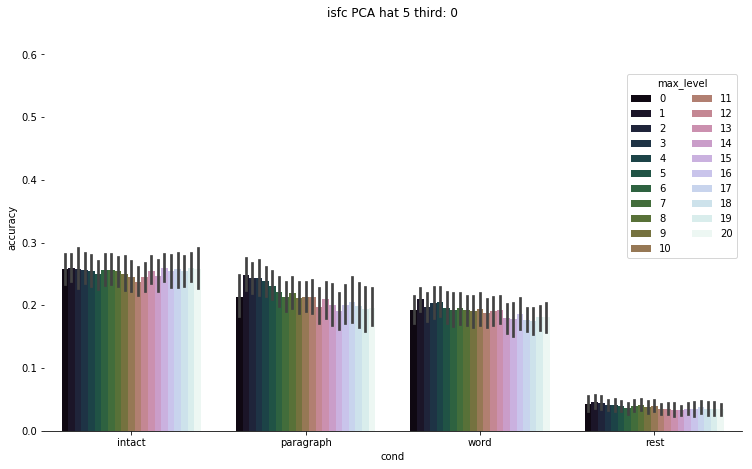

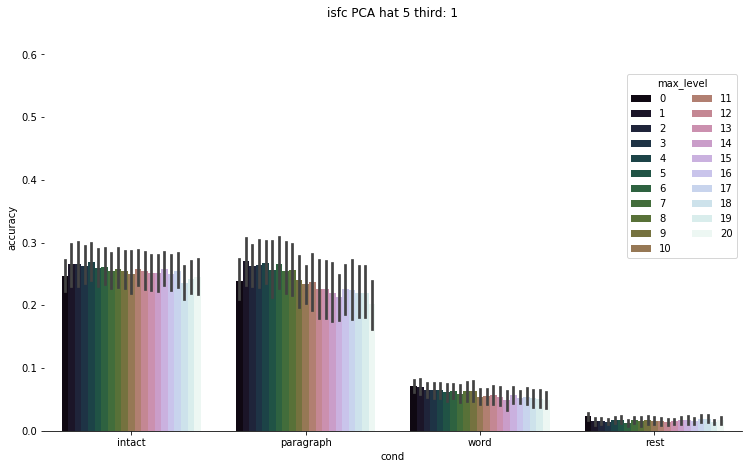

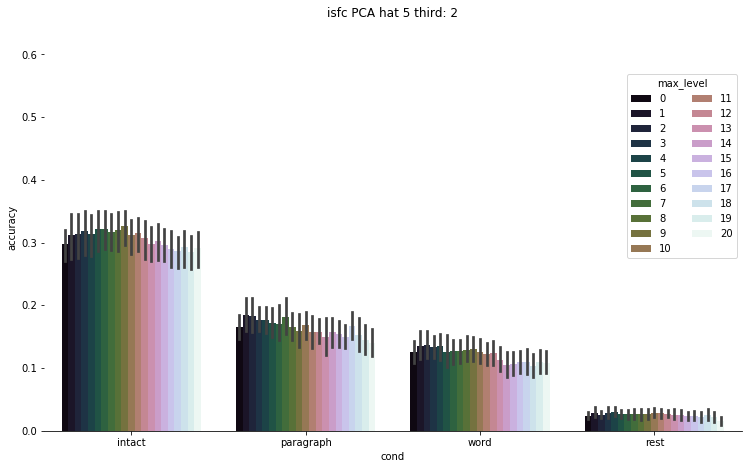

In [22]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        
        full_data_third = full_data[full_data['third'] == t]

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.png')
        grouped_barplot(full_data_third, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()
        
        

In [23]:
full_data

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_11,level_12,...,level_5,level_6,level_7,level_8,level_9,rank,iteration,third,cond,max_level
0,0,0.32,0.0228,0,20,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9668,7,0,intact,0
1,0,0.30,0.0241,0,20,0.500011,4.999893e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9657,7,0,intact,1
2,0,0.32,0.0241,0,20,0.415189,4.125401e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9659,7,0,intact,2
3,0,0.31,0.0236,0,20,0.317755,2.997342e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9655,7,0,intact,3
4,0,0.32,0.0205,0,20,0.190214,1.732027e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.9667,7,0,intact,4
5,0,0.30,0.0252,0,20,0.093741,6.405649e-02,NaN,NaN,NaN,...,2.361556e-01,NaN,NaN,NaN,NaN,0.9642,7,0,intact,5
6,0,0.31,0.0222,0,20,0.142825,1.428665e-01,NaN,NaN,NaN,...,1.428763e-01,1.428576e-01,NaN,NaN,NaN,0.9654,7,0,intact,6
7,0,0.27,0.0332,0,20,0.086635,1.301437e-01,NaN,NaN,NaN,...,1.500823e-01,8.911806e-02,9.996634e-02,NaN,NaN,0.9650,7,0,intact,7
8,0,0.26,0.0345,0,20,0.111083,1.111270e-01,NaN,NaN,NaN,...,1.111314e-01,1.111006e-01,1.110892e-01,1.111235e-01,NaN,0.9647,7,0,intact,8
9,0,0.25,0.0343,0,20,0.120776,1.347979e-01,NaN,NaN,NaN,...,1.988154e-01,7.880208e-02,2.879435e-02,1.108016e-01,1.079788e-02,0.9652,7,0,intact,9


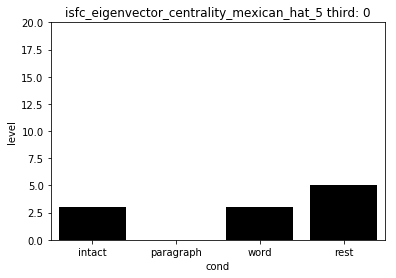

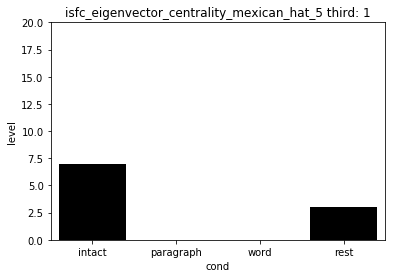

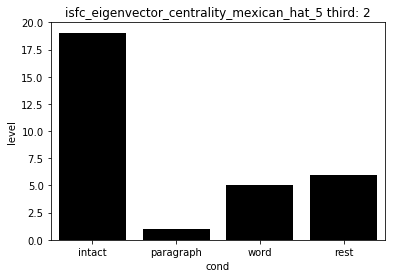

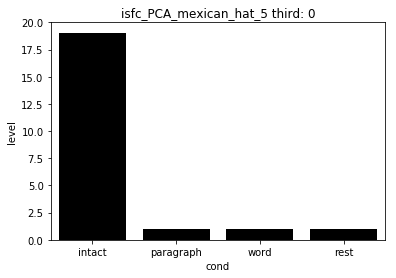

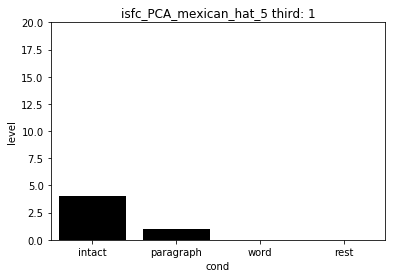

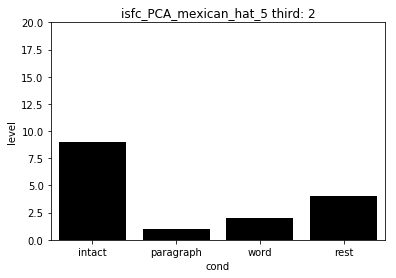

In [24]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = ['intact', 'paragraph', 'word', 'rest']
    
    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
        
    cs = ['intact', 'paragraph', 'word', 'rest']
            
    for t in range(3):
        data_third = full_data[full_data['third'] == t]

        levs = []

        df = data_third.groupby(['max_level', 'cond'], as_index=False)['accuracy'].mean()
        for c in cs:
            cond_df = df[df['cond'] == c]
            levs.append(cond_df[cond_df['accuracy'] == cond_df.max()['accuracy']]['max_level'].values[0])

        tmp_df = pd.DataFrame({'level':levs, 'cond':cs})
        g = sns.barplot(x='cond', y='level', color='k', data=tmp_df).set_title(param_name + ' third: ' + str(t))
        plt.ylim(0, 20)
        plt.show()

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


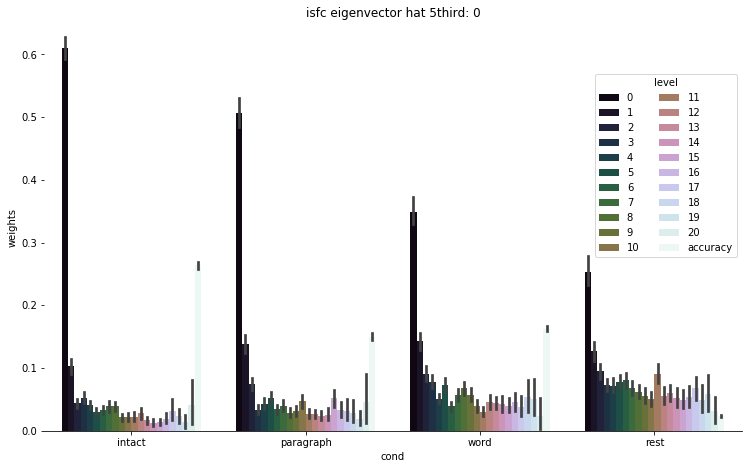

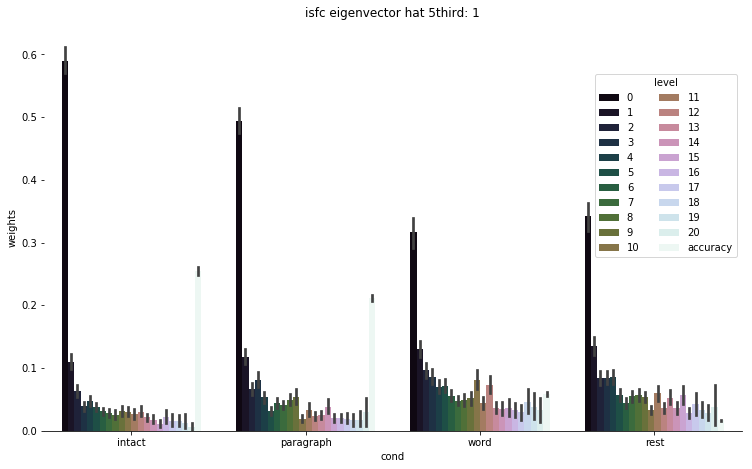

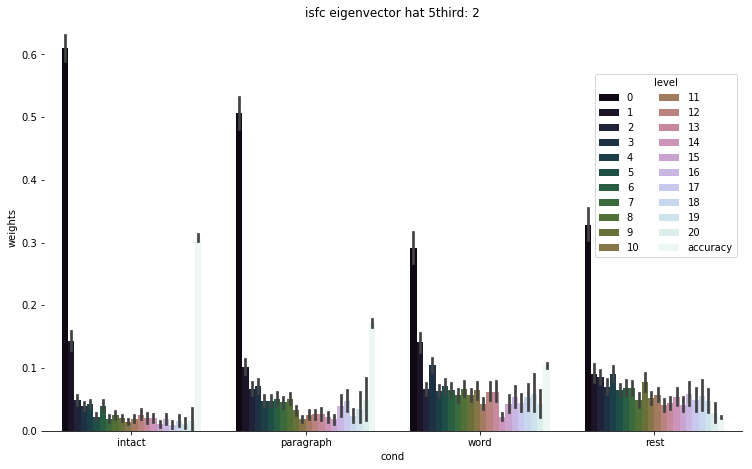

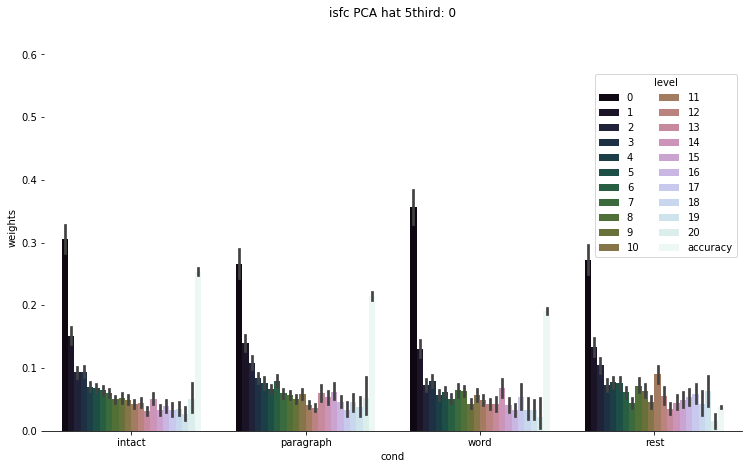

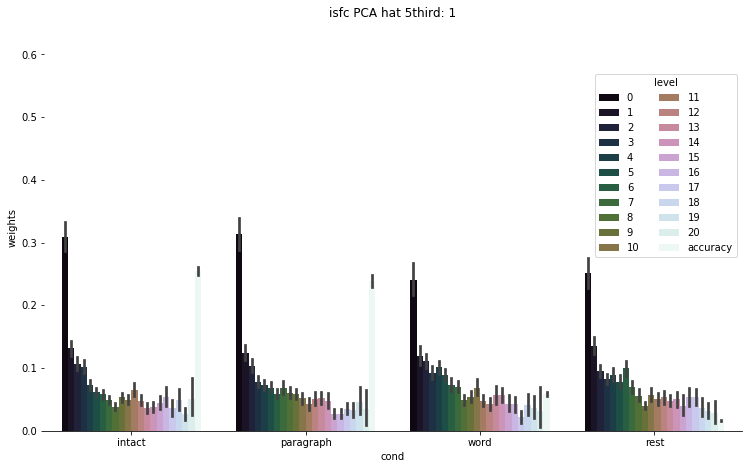

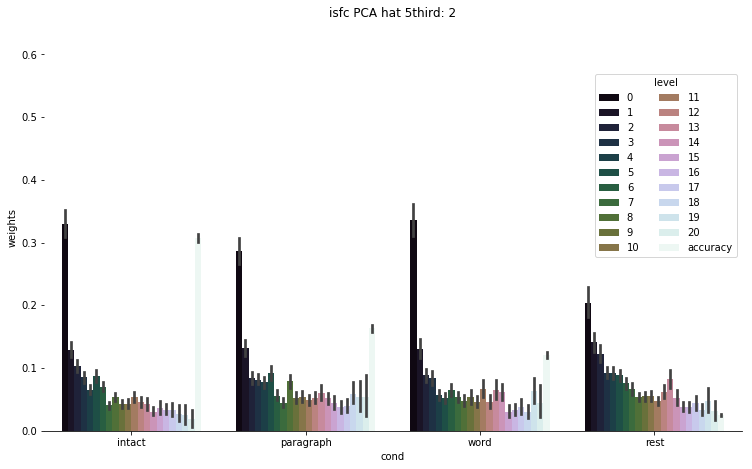

In [25]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        melted_df = pd.DataFrame()
        full_data_third = full_data[full_data['third'] == t]

        for c in np.arange(full_data_third['level'].max() + 2):
            if c!=full_data_third['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['level_' + str(c)]
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data_third['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['accuracy']
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data_third['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data_third['error'] = 1-full_data_third['error']

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + 'third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.png')
        grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()

## Mixing analysis

In [26]:
analysis_name = 'level_analysis_mixing'

In [27]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [28]:
params = glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


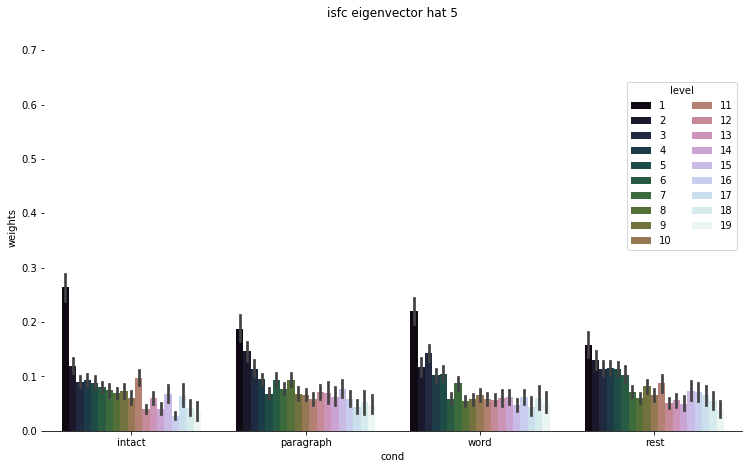

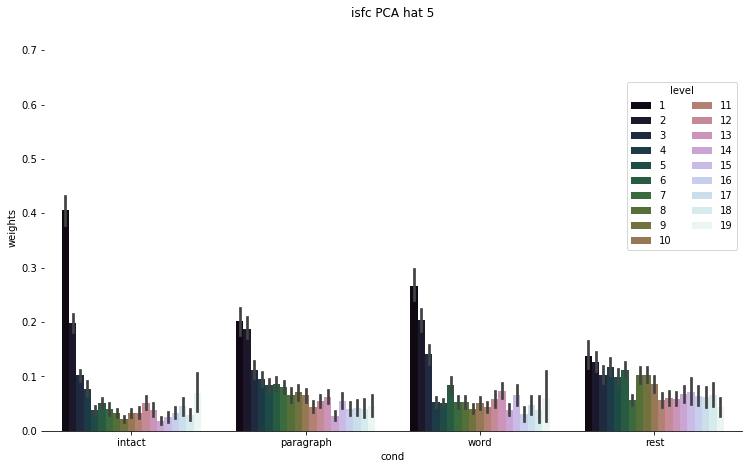

In [29]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(1, full_data['level'].max()):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


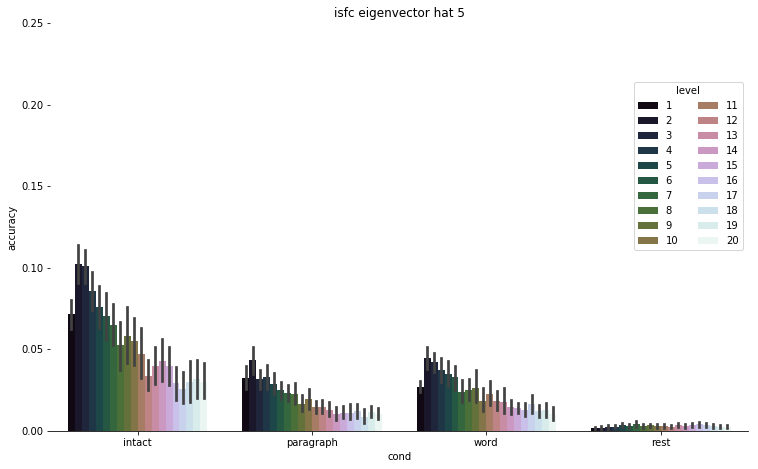

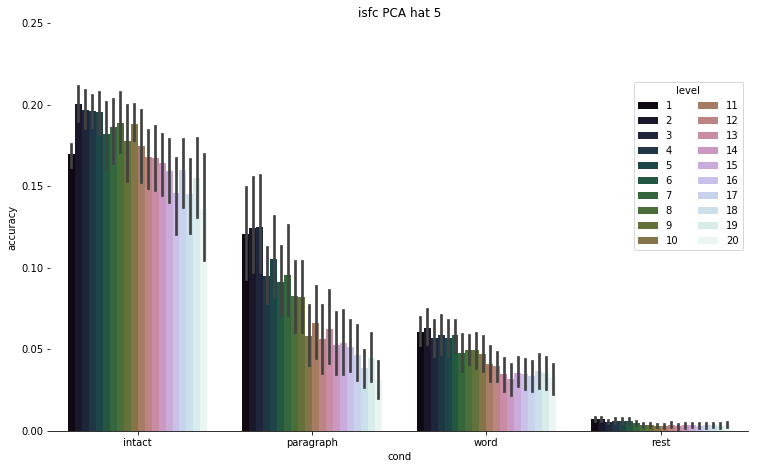

In [30]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.25, title=title, outfile=outfile)
    plt.close()

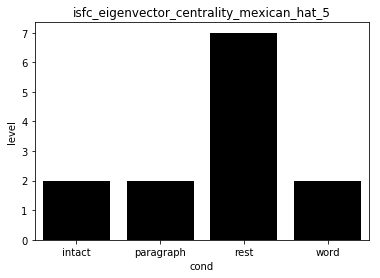

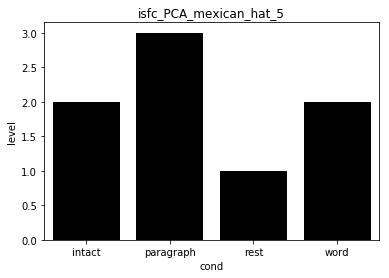

In [31]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    levs = []
    cs = []
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['max_level'] = 20 - data.isnull().sum(axis=1)
        df = data.groupby(['max_level'], as_index=False)['accuracy'].mean()
        levs.append(df[df['accuracy'] == df.max()['accuracy']]['max_level'].values[0])
        cs.append(os.path.basename(os.path.splitext(c)[0]))

    full_data = pd.DataFrame({'level':levs, 'cond':cs})
    sns.barplot(x='cond', y='level', color='k', data=full_data).set_title(param_name)
    plt.show()

In [32]:
conds

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_mixing/isfc_PCA_mexican_hat_5/intact.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_mixing/isfc_PCA_mexican_hat_5/paragraph.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_mixing/isfc_PCA_mexican_hat_5/rest.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/level_analysis_mixing/isfc_PCA_mexican_hat_5/word.csv']

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


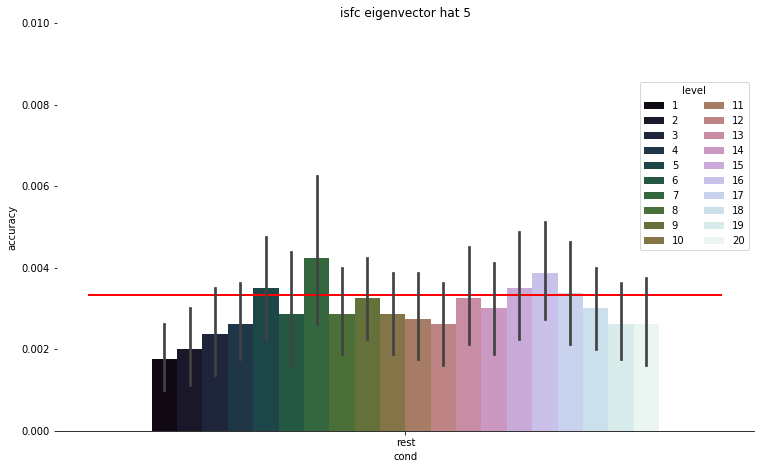

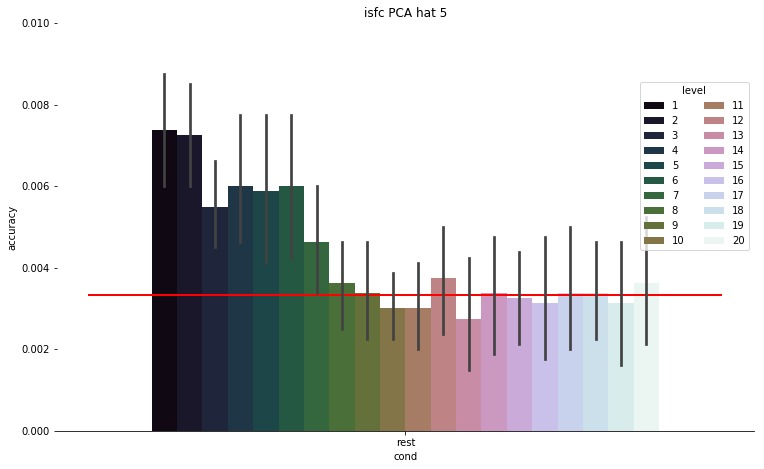

In [34]:
## rest
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    c = glob.glob(os.path.join(p, 'rest*'))[0]

    full_data = pd.DataFrame()
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])
    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)



    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    chance_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.01, title=title, outfile=outfile)
    plt.close()

In [ ]:

def chance_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    ax.hlines(y=1/300, xmin=-.5, xmax=.5, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')                                          